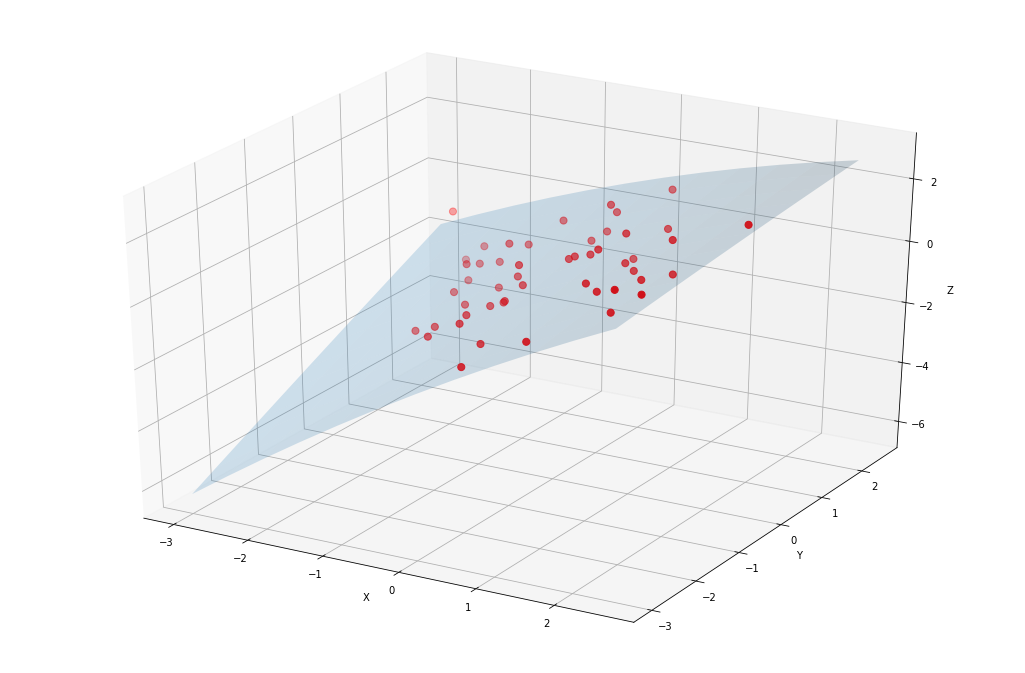

In [4]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
data = np.random.multivariate_normal(mean, cov, 50)

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
XX = X.flatten()
YY = Y.flatten()

order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure(figsize=(18,12),facecolor='w')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()


In [5]:
print data


[[-1.77579567  1.09552819 -1.98664132]
 [-1.53981579  0.66914578 -1.01367105]
 [-0.64174658 -0.31114972 -1.18780522]
 [-1.3145068   1.03482973 -1.12535849]
 [ 1.6377956  -0.20542812  0.77072072]
 [ 1.25140806 -1.21558678  0.86084159]
 [ 1.56085892 -0.0852824   1.7216145 ]
 [-0.28961043 -0.18396284 -0.45739399]
 [ 0.80057641  0.2272764   1.3508825 ]
 [ 1.00717047 -1.02865925  0.85783123]
 [-0.57427574  0.18973658 -0.60229251]
 [-0.58643988 -0.92407821 -0.95913703]
 [-1.83940469  1.56768794 -1.26019886]
 [-1.17147886  0.01619563 -1.65171742]
 [-1.58638131  1.04009112 -1.30975146]
 [ 1.49457527 -0.6603717   0.89762157]
 [ 1.81023785 -1.81219203  1.65187002]
 [-1.11873987 -0.73430025 -1.73904219]
 [ 0.06731022  1.31543557  0.87669907]
 [-0.97464032  0.67916278 -0.10284795]
 [-1.06695853  0.59580787 -1.51034488]
 [-0.90179652 -1.24031698 -1.53971928]
 [-0.17579324  1.16477584 -0.03160972]
 [-0.34114814 -0.4948456  -0.74271031]
 [ 1.05650102 -0.04586212  0.49690149]
 [ 0.8812758   0.07199178

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = np.random.rand(100,2)
y=X[:,0]**2-3*X[:,1]**3+2*X[:,0]*X[:,1]-5
# print 'y', y

poly = PolynomialFeatures(degree=3)
X_t = poly.fit_transform(X)
# print 'X', X
# print 'X_t', X_t

clf = LinearRegression()
clf.fit(X_t, y)
print(clf.coef_)
print(clf.intercept_)





[  0.00000000e+00  -4.76008122e-15  -1.42941214e-15   1.00000000e+00
   2.00000000e+00   4.77395901e-15   1.55431223e-15   1.67921232e-15
  -9.43689571e-16  -3.00000000e+00]
-5.0


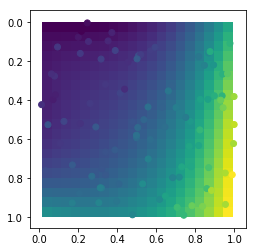

In [32]:
import itertools
def polyfit2d(x, y, z, order=3):
    ncols = (order + 1)**2
    G = np.zeros((x.size, ncols))
    ij = itertools.product(range(order+1), range(order+1))
    for k, (i,j) in enumerate(ij):
        G[:,k] = x**i * y**j
    m, _, _, _ = np.linalg.lstsq(G, z)
    return m

def polyval2d(x, y, m):
    order = int(np.sqrt(len(m))) - 1
    ij = itertools.product(range(order+1), range(order+1))
    z = np.zeros_like(x)
    for a, (i,j) in zip(m, ij):
        z += a * x**i * y**j
    return z

# Generate Data...
numdata = 100
x = np.random.random(numdata)
y = np.random.random(numdata)
z = x**2 + y**2 + 3*x**3 + y + np.random.random(numdata)

# Fit a 3rd order, 2d polynomial
m = polyfit2d(x,y,z, order=3)

# Evaluate it on a grid...
nx, ny = 20, 20
xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), nx), 
                         np.linspace(y.min(), y.max(), ny))
zz = polyval2d(xx, yy, m)

# Plot
plt.imshow(zz, extent=(x.min(), y.max(), x.max(), y.min()))
plt.scatter(x, y, c=z)

# fig = plt.figure(figsize=(18,12),facecolor='w')
# ax = fig.gca(projection='3d')
# ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, alpha=0.2)
# ax.scatter(x, y, z, c='r', s=50)

plt.show()

In [31]:
type(x)

numpy.ndarray